#**Análise de Dados com Pandas**

I) Intro

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Gapminder.csv', sep = ';')

In [ ]:
df.head()

In [ ]:
# renomeando as colunas
df = df.rename(columns = {'country': 'Pais', 'continent': 'Continente', 'year': 'Ano', 'lifeExp': 'vidaExp', 'pop': 'popTotal', 'gdpPercap': 'PIB'})

In [ ]:
df

In [ ]:
# retornando o total de linhas e colunas (L, C)
df.shape

# retornando os nomes das colunas
df.columns

#retornando os tipos de dados
df.dtypes

In [ ]:
# retornando as 10 últimas linhas
df.tail(10)

In [ ]:
# retornando infos estatísticas
df.describe()

In [ ]:
# retornando os continentes presentes no dataset
df['Continente'].unique()

# filtrando as infos da Oceania
Oceania = df.loc[df['Continente'] == 'Oceania']
Oceania

In [ ]:
# agrupando dados

# descobrindo a quantidade de países por continente de acordo com o dataset
df.groupby('Continente')['Pais'].nunique()

# descobrindo a média da espectativa de vida por ano
df.groupby('Ano')['vidaExp'].mean()

# descobrindo a média do PIB
df['PIB'].mean()

# somando PIB's
df['PIB'].sum()


II) Trabalhando com Planilhas Excel

In [ ]:
# lendo arquivos de uma base de vendas
# utilizando o método de upload de planilhas para fazer uma análise pontual
df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')

In [ ]:
# concatenando dataframes
df = pd.concat([df1, df2, df3, df4, df5])
df

In [ ]:
# retornando uma amostra aleatória de 5 linhas
df.sample(5)

In [ ]:
# observando tipos de dados
df.dtypes

# alterando o tipo de dado da coluna LojaID
df['LojaID'] = df['LojaID'].astype(object)

df.dtypes

In [ ]:
# consultando linhas com valores nulos
df.isnull().sum()

# substituindo os valores nulos pela média
# utilizando inplace para substituir em memória
df['Vendas'].fillna(df['Vendas'].mean(), inplace = True)

df.isnull().sum()

'''
# substituindo os valores nulos por zero
df['Vendas'].fillna(0, inplace = True)

# apagando linhas com valores nulos
df.dropna(inplace = True)

# apagando linhas com valores nulos em uma coluna específica
df.dropna(subset = ['Vendas'], inplace = True)

# apagando linhas com valores nulos em todas colunas
df.dropna(how = 'all', inplace = True)
'''

In [ ]:
# criando uma coluna de receita, i.e., vendas vezes quantidade
df['Receita'] = df['Vendas'].mul(df['Qtde'])
df

In [ ]:
# retornando a maior receita
df['Receita'].max()

#retornando a menor receita
df['Receita'].min()

# retornando todas as infos sobre as 3 lojas que tiveram maior receita
df.nlargest(3, 'Receita')

# retornando todas as infos sobre as 3 lojas que tiveram menor receita
df.nsmallest(3, 'Receita')

In [ ]:
# agrupando por cidade para retornar a receita total por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
# ordenando dados
df.sort_values('Receita', ascending = False).head(10)

III) Trabalhando com Datas

In [ ]:
# transformando a coluna data de datatime para integer
df['Data'] = df['Data'].astype('int64')
df.dtypes

# transformando a coluna de data novamente em datatime
df['Data'] = pd.to_datetime(df['Data'])
df.dtypes

# agrupando por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

# criando uma nova coluna correlacionando ano e vendas
df['Ano_Venda'] = df['Data'].dt.year

df.sample(5)

# extraindo mês e dia da venda
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)
df.sample(5)

# retornando a data mais antiga
df['Data'].min()

# calculando a diferenca de dias
data_mais_antiga = df['Data'].min()
df['diferenca_dias'] = df['Data'] - data_mais_antiga

df.sample(5)

# criando coluna de trimestre
df['trimestre_venda'] = df['Data'].dt.quarter
df.sample(5)

# filtrando as vendas de abril de 2018
vendas_abril_2018 = df.loc[(df['Data'].dt.year == 2018) & (df['Data'].dt.month == 4)]
vendas_abril_2018

**Boas Práticas para Análise de Dados**

IV) Visualização de dados

In [ ]:
# retornando quantidade de linhas (== vendas) para cada loja
df['LojaID'].value_counts(ascending = False)

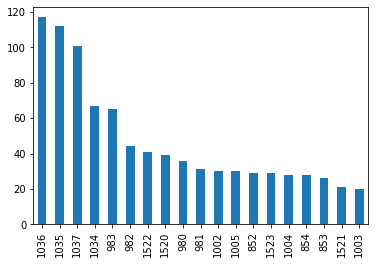

In [ ]:
# gráfico de barras
df['LojaID'].value_counts(ascending = False).plot.bar()

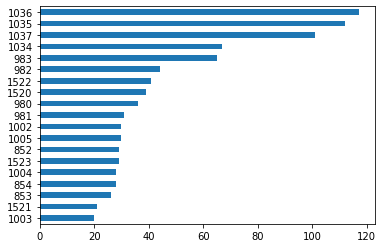

In [ ]:
# gráfico de barras horizontais
df['LojaID'].value_counts(ascending = True).plot.barh();

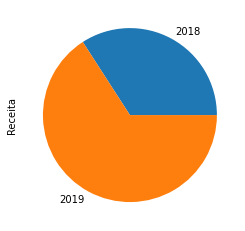

In [ ]:
# gráfico em pizza da receita por ano
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

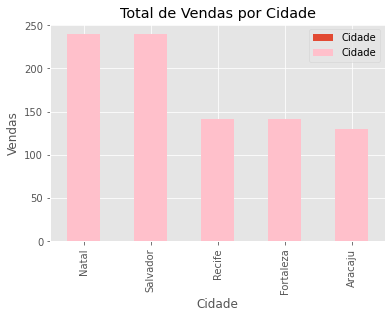

In [ ]:
vendas_por_cidade = df['Cidade'].value_counts()

# adicionando título e mudando nome dos eixos
import matplotlib.pyplot as plt
vendas_por_cidade.plot.bar(title = 'Total de Vendas por Cidade')

plt.xlabel('Cidade')
plt.ylabel('Vendas');

# https://matplotlib.org/stable/gallery/index.html
#alterando estilo
plt.style.use('ggplot')

# alterando cor e colocando legenda
vendas_por_cidade.plot.bar(title = 'Total de Vendas por Cidade', color = 'pink')
plt.legend()




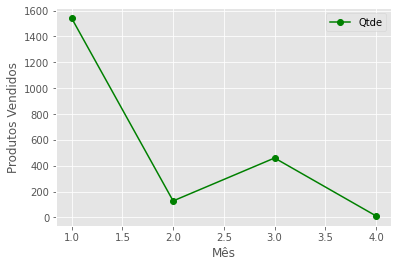

In [ ]:
# a quantidade de produtos vendidos por cada mês (independente de ano)
df.groupby(df['mes_venda'])['Qtde'].sum()

# selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

# plot do total de produtos vendidos por mês
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'o', color = 'green')

plt.xlabel('Mês')
plt.ylabel('Produtos Vendidos')
plt.legend();

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

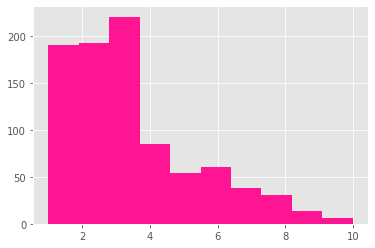

In [ ]:
# plotando um histograma da quantidade de produtos vendidos
plt.hist(df['Qtde'], color = 'deeppink')

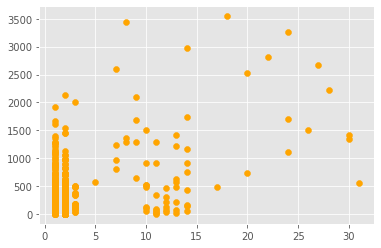

In [ ]:
# plotando gráfico de dispensão
# atenção aos parâmetros x e y
plt.scatter(x = df_2019['dia_venda'], y = df_2019['Receita'], color = 'orange');

In [ ]:
# como salvar gráficos plotados

# gráfico de dispensão da célula anterior
plt.scatter(x = df_2019['dia_venda'], y = df_2019['Receita'], color = 'orange')

# atenção a extensão
# salvando...
plt.savefig('Gráfico de Dispersão.png')
plt.savefig('Gráfico de Dispersão.pdf')

# está em files preparado para download

V) 1. Análise Exploratória 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [ ]:
# upload de arquivos via código
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [ ]:
# criando dataframe
df = pd.read_excel('AdventureWorks.xlsx')
df

In [ ]:
# quantidade de linhas e colunas
df.shape

(904, 16)

In [ ]:
# tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [ ]:
# Qual a receita total?
df['Valor Venda'].sum()

5984606.1426

In [ ]:
# Qual o custo total?

#criando coluna de custo
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])

df.head(1)

# custo total arredondado com duas casas decimais
round(df['Custo'].sum(), 2)

2486783.05

In [ ]:
# Qual é o lucro total?

# criando coluna lucro
df['Lucro'] = df['Valor Venda'] - df['Custo']
df

# lucro total
round(df['Lucro'].sum(), 2)

3497823.09

In [ ]:
# Quanto tempo levou para que cada produto fosse enviado?

# criando coluna para tempo de envio
df['Tempo Envio'] = df['Data Envio'] - df['Data Venda']
df.sample(8)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
190,2008-10-20,2008-10-31,307,1155,19107,200810204CS646,324.69,980.0,12,0.00,11760.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,3896.28,7863.72,11 days
147,2009-06-23,2009-07-04,199,366,18957,200906233CS868,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,2091.48,2456.52,11 days
613,2009-02-20,2009-02-27,306,366,19063,200902203CS740,348.58,758.0,8,424.48,5639.52,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,2788.64,2850.88,7 days
448,2009-08-24,2009-08-31,199,1155,18983,200908244CS896,324.69,980.0,16,1568.00,14112.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,5195.04,8916.96,7 days
476,2009-11-07,2009-11-17,306,366,19076,200911073CS767,348.58,758.0,12,1819.20,7276.80,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,4182.96,3093.84,10 days
827,2009-03-31,2009-04-11,199,1202,18927,200903314CS836,330.66,998.0,6,299.40,5688.60,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1983.96,3704.64,11 days
892,2008-06-17,2008-06-21,307,1226,19100,200806174CS596,330.99,999.0,6,599.40,5394.60,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1985.94,3408.66,4 days
225,2009-07-16,2009-07-29,307,384,19129,200907163CS719,348.58,758.0,8,0.00,6064.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2788.64,3275.36,13 days


In [192]:
# Qual a média do tempo de envio para cada marca?

# extraindo os dias (em integer, i.e., sem "days" como está na coluna) da coluna "Tempo Envio"
df['Tempo Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days
df

df['Tempo Envio'].dtype

# extraindo a média desejada
df.groupby('Marca')['Tempo Envio'].mean()

Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Tempo Envio, dtype: float64

In [ ]:
# vericando a presença de nulos
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo Envio       0
dtype: int64

In [ ]:
# sem notação científica no resultado do próximo bloco
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
# E sobre o lucro por ano e por marca? ...

# agrupando por ano e por marca
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [ ]:
# obs. resetando index --> retornando na forma de tabela
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [ ]:
# Qual é o total de produtos vendidos?

# agrupando por produtos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending = False).reset_index()

,Produto,Quantidade
0,Headphone Adapter for Contoso Phone E130 Silver,25232
1,Headphone Adapter for Contoso Phone E130 White,25008
2,Adventure Works Laptop15.4W M1548 Black,1089
3,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
4,Adventure Works Laptop15.4W M1548 Red,1047
5,Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
7,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
8,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789


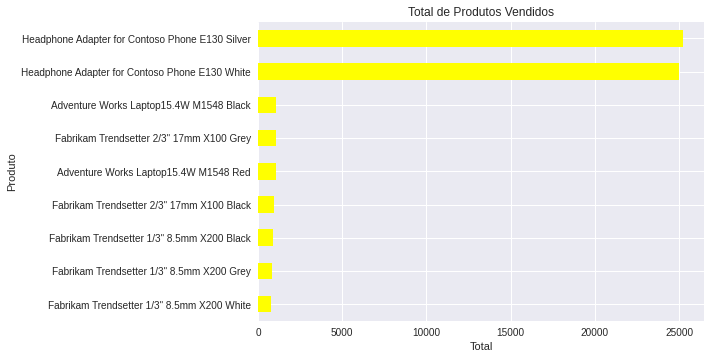

In [ ]:
# gráfico de barra horizontal do total de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending = True).plot.barh(title = 'Total de Produtos Vendidos', color = 'yellow')
plt.xlabel('Total')
plt.ylabel('Produto');

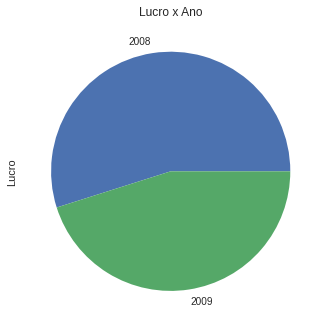

In [ ]:
# gráfico de pizza do lucro anual
lucro_anual = df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()
lucro_anual.plot.pie(title = 'Lucro x Ano');


In [ ]:
lucro_anual

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

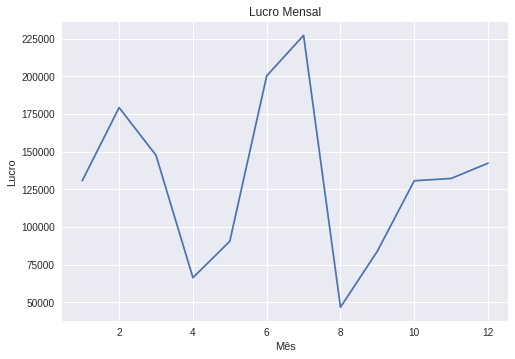

In [ ]:
# analisando as vendas de 2009, o ano com menos lucro no total

# selecionando apenas as vendas de 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]
df_2009

# plotando o lucro mensal num gráfico de linha
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title = 'Lucro Mensal')
plt.xlabel('Mês')
plt.ylabel('Lucro');

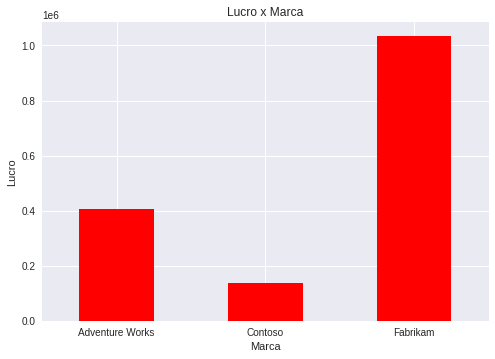

In [ ]:
# plotando o lucro por marca num gráfico de barras
df_2009.groupby(df_2009['Marca'])['Lucro'].sum().plot.bar(title = 'Lucro x Marca', color = 'red')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation = 'horizontal');

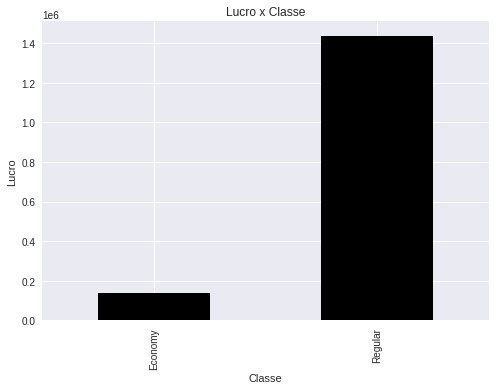

In [ ]:
# plotando o lucro por classe num gráfico de barras
df_2009.groupby(df_2009['Classe'])['Lucro'].sum().plot.bar(title = 'Lucro x Classe', color = 'black')
plt.xlabel('Classe')
plt.ylabel('Lucro');

V) 2. Um pouquinho de Estatística 

In [193]:
# análise estatística do tempo de envio

df['Tempo Envio'].describe()

# observe que 25% e 75% das operações enviam produtos em, respectivamente, 6 e 11 dias
# e que a mediana do tempo de envio é 9 dias

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

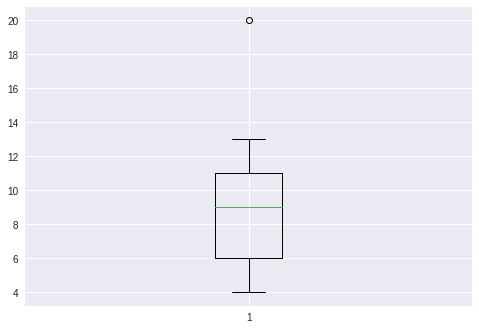

In [194]:
# gráfico de boxplot
plt.boxplot(df['Tempo Envio']);

# obs. note que outlier = 20

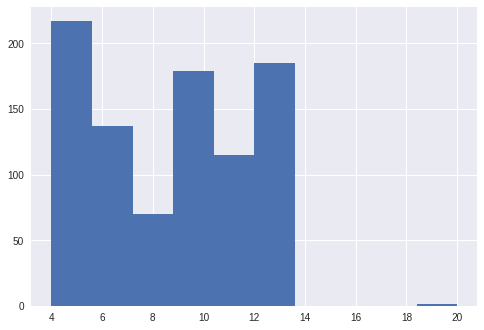

In [196]:
# histograma
plt.hist(df['Tempo Envio']);

In [197]:
# identificação de outlier
df[df['Tempo Envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
